<a href="https://colab.research.google.com/github/nrutyadoshi/PM/blob/master/Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import numpy as np
import pandas as pd

In [0]:
files = files.upload()

Saving toy_dataset.csv to toy_dataset.csv


In [0]:
toy = pd.read_csv("toy_dataset.csv")

In [0]:
toy.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [0]:
toy.drop(["Number"],1,inplace=True)

In [0]:
toy.isna().sum()

City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [0]:
toy.Gender.value_counts()

Male      83800
Female    66200
Name: Gender, dtype: int64

Using label encoding for binary variables

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
label = LabelEncoder()

In [0]:
toy.Gender = label.fit_transform(toy.Gender)

In [0]:
toy.Illness = label.fit_transform(toy.Illness)

In [0]:
toy.head()

,City,Gender,Age,Income,Illness
0,Dallas,1,41,40367.0,0
1,Dallas,1,54,45084.0,0
2,Dallas,1,42,52483.0,0
3,Dallas,1,40,40941.0,0
4,Dallas,1,46,50289.0,0


Doing one hot encoding using dummy method for multi class variables

In [0]:
City = pd.get_dummies(toy.City)

In [0]:
City.head()

,Austin,Boston,Dallas,Los Angeles,Mountain View,New York City,San Diego,Washington D.C.
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [0]:
toy = pd.concat([toy, City],1)

In [0]:
toy.drop(["City","Washington D.C."],1,inplace=True)

In [0]:
toy.head()

,Gender,Age,Income,Illness,Austin,Boston,Dallas,Los Angeles,Mountain View,New York City,San Diego
0,1,41,40367.0,0,0,0,1,0,0,0,0
1,1,54,45084.0,0,0,0,1,0,0,0,0
2,1,42,52483.0,0,0,0,1,0,0,0,0
3,1,40,40941.0,0,0,0,1,0,0,0,0
4,1,46,50289.0,0,0,0,1,0,0,0,0


Since there is class imbalance we do over sampling

In [0]:
toy.Illness.value_counts() # aproximately ratio of 8 to 92, therefore there is class imbalance

0    137861
1     12139
Name: Illness, dtype: int64

In [0]:
from sklearn.utils import resample

In [0]:
zero = toy[toy.Illness==0]
one = toy[toy.Illness==1]

In [0]:
one_upsampled = resample(one,
                          replace=True,
                          n_samples=len(zero),
                          random_state=27) 

In [0]:
upsampled = pd.concat([zero, one_upsampled])

In [0]:
upsampled.Illness.value_counts()

1    137861
0    137861
Name: Illness, dtype: int64

Plotting the correlation matrix

In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

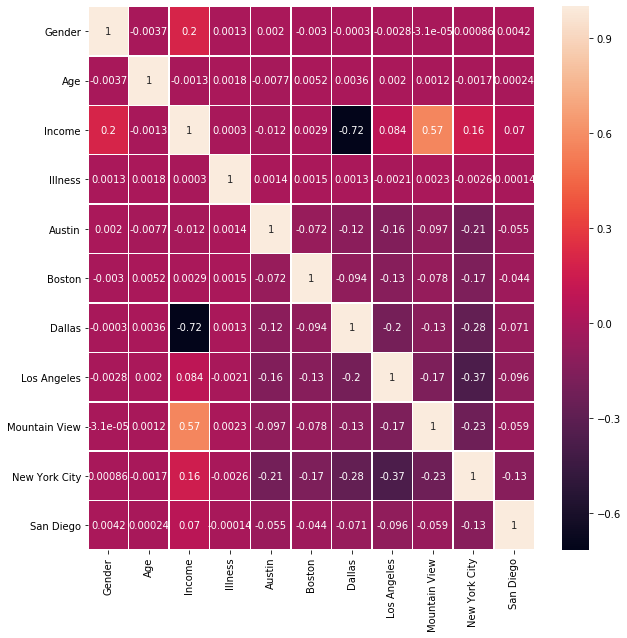

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(toy.corr(), annot=True, linewidths=.5, ax=ax)

Splitting into train and test data

In [0]:
X = upsampled.drop(["Illness"],1)
Y = upsampled.Illness

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
X_train, X_test, Y_train, Y_test  = tts(X, Y, test_size  = 0.2, random_state = 42)

In [0]:
X_test.head()

,Gender,Age,Income,Austin,Boston,Dallas,Los Angeles,Mountain View,New York City,San Diego
41264,1,38,84919.0,0,0,0,0,0,1,0
38502,0,42,84446.0,0,0,0,0,0,1,0
40915,0,33,90207.0,0,0,0,0,0,1,0
126373,1,46,78065.0,0,0,0,0,0,0,0
43698,1,64,95264.0,0,0,0,0,0,1,0


Doing logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()

In [0]:
log.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Y_pred = log.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
print(accuracy_score(Y_test, Y_pred))

0.49777858373379275


In [0]:
print(confusion_matrix(Y_test, Y_pred))

[[22986  4418]
 [23277  4464]]


In [0]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.84      0.62     27404
           1       0.50      0.16      0.24     27741

    accuracy                           0.50     55145
   macro avg       0.50      0.50      0.43     55145
weighted avg       0.50      0.50      0.43     55145



Here we get a low accuracy this is due to low correlation between the dependent variable Y and the independent variables X, as seen from the heatmap.